In [2]:
#@title run tenseflow
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
#@title load MNIST dataset
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# Output pixel #16 of row #10 of example #2900.
x_train[2900][15][10]

0

In [6]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0 
print(x_train_normalized[2900][15]) # Output a normalized row

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11372549
 0.66666667 1.         0.66666667 0.11372549 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [7]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [8]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  # Sequential groups a linear stack of layers into a tf.keras.Model.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist 

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 29ms/step - loss: 1.6541 - accuracy: 0.5048 - val_loss: 0.8953 - val_accuracy: 0.7989
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.8611 - accuracy: 0.7358 - val_loss: 0.5199 - val_accuracy: 0.8639
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 0.6231 - accuracy: 0.8119 - val_loss: 0.4125 - val_accuracy: 0.8891
Epoch 4/50
12/12 [==============================] - 0s 18ms/step - loss: 0.5196 - accuracy: 0.8447 - val_loss: 0.3526 - val_accuracy: 0.9022
Epoch 5/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4670 - accuracy: 0.8605 - val_loss: 0.3210 - val_accuracy: 0.9102
Epoch 6/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4271 - accuracy: 0.8751 - val_loss: 0.2989 - val_accuracy: 0.9168
Epoch 7/50
12/12 [==============================] - 0s 18ms/step - loss: 0.3986 - accuracy: 0.8823 - val_loss: 0.2813 - val_accuracy: 0.9225
Epoch 8/50
12/12 [======

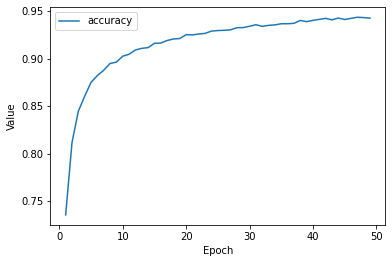

In [10]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)